TP1 TSIA211


### EX1 


There are 400 images in the database.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.sparse
import scipy.sparse.linalg

In [4]:
pixel = 92 *112
print('each image has ', pixel,' pixels')


each image has  10304  pixels


In [5]:
#read file 
def build_matrix_from_faces(folder='att_faces', minidata=False):
    # load images
    # 400 images of size (112, 92)
    M = []
    if minidata is True:
        nb_subjects = 1
    else:
        nb_subjects = 40
    for subject in range(1, nb_subjects + 1
                        ):
        for image in range(1, 11):
            face = plt.imread(folder + '/s' + str(subject)
                              + '/' + str(image) + '.pgm')
            M.append(face.ravel())

    return np.array(M, dtype=float)

def vectorize(W, H):
    return np.concatenate((W.ravel(), H.ravel()))

def unvectorize_M(W_H, M):
    # number of elements in W_H is (n+p)*k where M is of size n x m
    # W has the nk first elements
    # H has the kp last elements
    n, p = M.shape
    k = W_H.shape[0] // (n + p)
    W = W_H[:n * k].reshape((n, k))
    H = W_H[n * k:].reshape((k, p))
    return W, H

In [14]:
# Small data to test the algorithm
M = build_matrix_from_faces(folder='att_faces', minidata=True)
def unvectorize(W_H): 
    return unvectorize_M(W_H, M)
k = 2

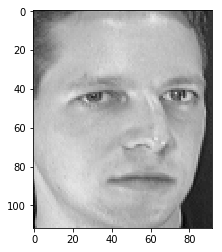

In [15]:
# To see the first face:
plt.imshow(M[1].reshape((112, 92)), cmap='gray'); plt.show()

In [8]:
# Full data
M = build_matrix_from_faces(folder='att_faces', minidata=False)
def unvectorize(W_H): 
    return unvectorize_M(W_H, M)
k = 38
M.bui

### EX2.1


In [23]:
 %%latex
 Pour montrer que la fonction n'est pas convex, il faut qu'on puisse trouver un exemple non convex.
 On prend W1 =[1], H1=[2], W2 =[2], H2 = [1],M = [1]
 $$ f({ W }_{ 1 },{ H }_{ 1 })=\frac { 1 }{ 2*1*1 } *(1-2*1)=\frac { 1 }{ 2 } $$
 $$ f({ W }_{ 2 },{ H }_{ 2 })=\frac { 1 }{ 2*1*1 } *(1-2*1)=\frac { 1 }{ 2 } $$
 $$ f(\frac{{W}_{1}+{W}_{2}}{2},\frac{{H}_{1}+{H}_{2}}{2})=\frac{1}{2*1*2}*(1-\frac{2+1}{2}*\frac{2+1}{2})=\frac{9}{4} $$
 Donc, $$\frac{1}{2}*f({ W }_{ 1 },{ H }_{ 1 })*f({ W }_{ 2 },{ H }_{ 2 }) <f(\frac{{W}_{1}+{W}_{2}}{2},\frac{{H}_{1}+{H}_{2}}{2},)$$
 Donc, la fonction n'est pas convex.


<IPython.core.display.Latex object>

### EX2.2

In [37]:
%%latex

Calculater le gradient 
$$ f({ W },{ H })=\frac { 1 }{ 2*n*p } *\parallel M-WH\parallel $$
$$ \frac {\alpha  f}{\alpha W} =\frac{1}{2np} * tr(({M-WH}^{T})*(M-WH)) $$
$$ \quad     \quad                       =tr({M}^{T}*M)-2tr({M}^{T}WH)+tr({H}^{T}{W}^{T}WH)$$
$$ \quad     \quad                       =\frac{1}{np}(-M{H}^{T}+WH{H}^{T})$$


$$ \frac {\alpha  f}{\alpha H} =\frac{1}{2np} * tr(({M-WH}^{T})*(M-WH)) $$
$$ \quad   \quad                         =tr({M}^{T}*M)-2tr({M}^{T}WH)+tr({H}^{T}{W}^{T}WH)$$
$$ \quad   \quad                         =\frac{1}{np}(-{W}^{T}M+{W}^{T}{W}{H})$$


<IPython.core.display.Latex object>

In [42]:
%%latex
Pour être lipschitz continus, il faut que le degré de la polynomiale inférieur 1, c'est à dire le degré <=1
Dans ce cas là, le degré =3, donc ce n'est pas lipschitz continue

<IPython.core.display.Latex object>

### EX3.1

In [18]:
W0, S, H0 = scipy.sparse.linalg.svds(M,k)
print(W0.shape)
print(S.shape)
print(H0.shape)


(10, 2)
(2,)
[  4915.17649804  45705.53261464]
(2, 10304)


C'est une méthode d'approximation. le désavantage de svds est qu'il va décomposer des matrice non positifs. Donc, on va forcer WO et H0 en value non négatif.

L'autre possibilité pour l'initialisation: on peut prendre la méthode LU décomposition. 

### EX3.2